In [1]:
# Author: Geethu Thottungal Harilal
# data from : https://power.larc.nasa.gov/data-access-viewer/

# This code will provide visualization plots for total temperature and rainfall for first and last five years of 
# entire duration, number of hot and rainy days in yearwise for all four locations and average monthly 
# temperature for the entire duration for all four locations

In [2]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Read data
data_en = pd.read_csv("England_dataset_cleaned.csv",parse_dates=True) #England data
data_wl = pd.read_csv("Wales_dataset_cleaned.csv",parse_dates=True) #Wales data
data_sc = pd.read_csv("Scotland_dataset_cleaned.csv",parse_dates=True) #Scotland data
data_ir = pd.read_csv("Ireland_dataset_cleaned.csv",parse_dates=True) #Northern Ireland data

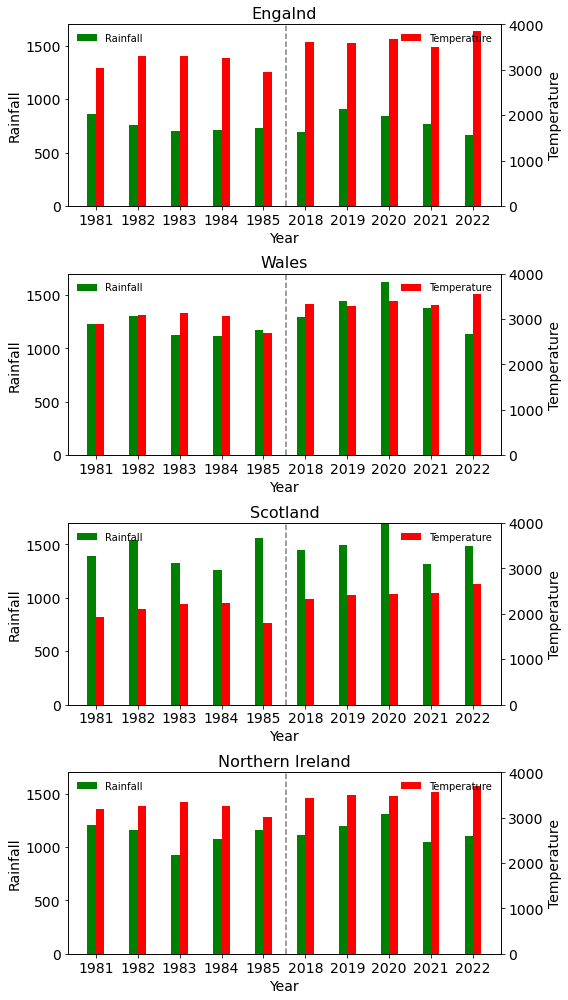

In [4]:
import calendar

# Convert 'date' column to datetime format
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

data_en['year'] = data_en['date'].dt.year
data_wl['year'] = data_wl['date'].dt.year
data_sc['year'] = data_sc['date'].dt.year
data_ir['year'] = data_ir['date'].dt.year


# years in the analysis
years_of_interest = [1981, 1982, 1983, 1984, 1985, 2018, 2019, 2020, 2021, 2022]

# Initialize empty lists to store annual sums for each place
rainfall_sums = {'EN': [],  'WL': [], 'SC': [],'IR': []}
temperature_sums = {'EN': [],  'WL': [],'SC': [], 'IR': []}
title = ['Engalnd', 'Wales', 'Scotland', 'Northern Ireland']
# Calculate annual sums for each year of interest
for year in years_of_interest:
    for place, data in [('EN', data_en),  ('WL', data_wl),('SC', data_sc), ('IR', data_ir)]:
        annual_rain_sum = data[(data.year == year)]['Rainfall'].sum()
        annual_temp_sum = data[(data.year == year)]['T2M'].sum()
        rainfall_sums[place].append(annual_rain_sum)
        temperature_sums[place].append(annual_temp_sum)

# Create subplots with a 4x1 grid
fig, axes = plt.subplots(4, 1, figsize=(8, 14))

# Loop through places and plot annual sums as bar plots
for i, place in enumerate(['EN', 'WL', 'SC', 'IR']):
    ax = axes[i]
    
    bar_width = 0.2
    index = np.arange(len(years_of_interest))
    
    ax.bar(index, rainfall_sums[place], width=bar_width, label='Rainfall', align='center', color='green')
    
    # Adjust the position for the temperature bars to avoid overlapping
    ax2 = ax.twinx()
    ax2.bar(index + bar_width, temperature_sums[place], width=bar_width, label='Temperature', color='red', align='center')
    
    ax.set_title(f'{title[i]}', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Rainfall', fontsize=14)
    ax2.set_ylabel('Temperature', fontsize=14)
    ax2.set_ylim(0, 4000)
    ax.set_ylim(0, 1700)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(index + bar_width / 2, years_of_interest)
    ax.legend(loc='upper left',frameon=False)
    ax2.legend(loc='upper right',frameon=False)

    # Add dashed line between 1985 and 2018
    ax.axvline(x=years_of_interest.index(1985) + 0.65, color='gray', linestyle='--')


plt.tight_layout()
plt.show()

### yearly count of hot and rainy days

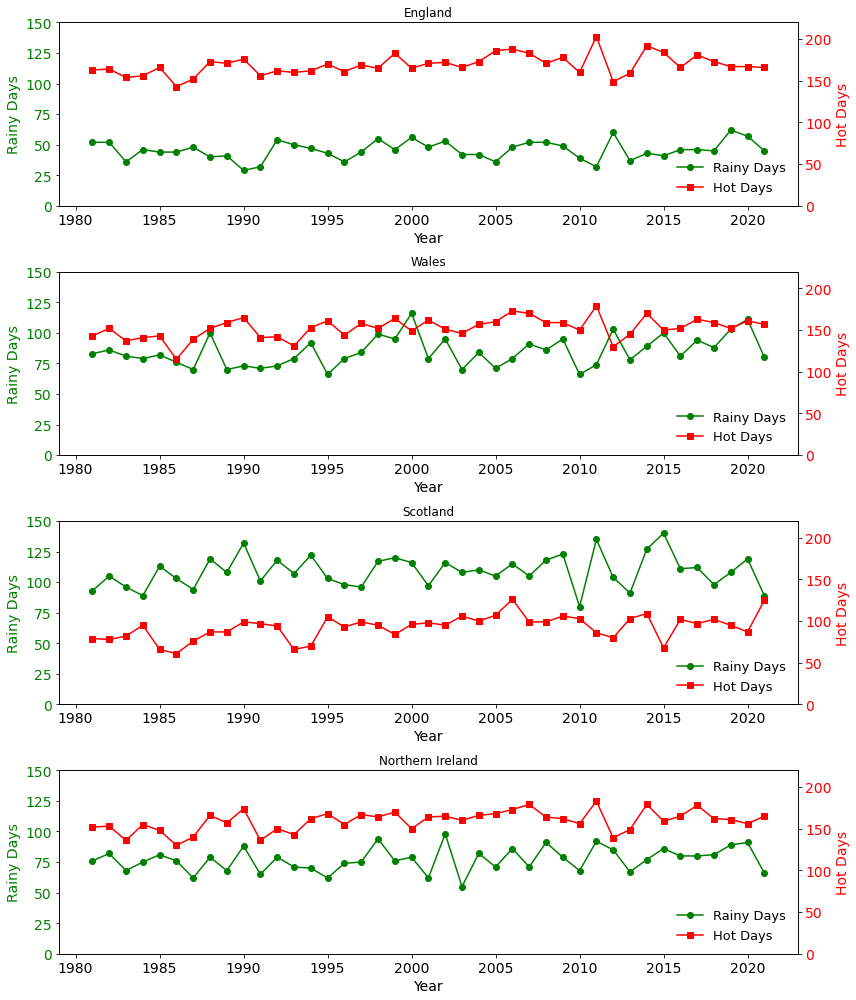

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])
titiles = ["England","Wales","Scotland","Northern Ireland"]
# Create a list of data frames
data_frames = [data_en, data_wl,data_sc, data_ir]

# Initialize subplots in a 4x1 grid
fig, axs = plt.subplots(4, 1, figsize=(12, 14))

# Loop through data frames and create subplots
for i, data in enumerate(data_frames):
    # Filter out data for years excluding 2023
    data = data[data['date'].dt.year != 2023]
    
    # Initialize lists to store total rainy days and hot days for each year
    years = []
    rainy_days = []
    hot_days = []
    
    # Loop through each year and calculate rainy and hot days
    for year in range(1981, 2022):
        year_data = data[data['date'].dt.year == year]
        rainy_day_count = (year_data['Rainfall'] > 5).sum()
        hot_day_count = (year_data['T2M'] > 10).sum()
        years.append(year)
        rainy_days.append(rainy_day_count)
        hot_days.append(hot_day_count)

    # Create a subplot with two y-axes
    ax1 = axs[i]
    
    # Plot the rainy days on the primary y-axis
    ax1.plot(years, rainy_days, color='g', marker='o', label='Rainy Days')
    ax1.set_ylabel('Rainy Days', color='g',fontsize=14)
    ax1.tick_params(axis='y', labelcolor='g')
    ax1.set_ylim(0,150)
    ax1.set_xlabel('Year',fontsize=14)
     # Plot the hot days on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(years, hot_days, color='r', marker='s', label='Hot Days')
    ax2.set_ylabel('Hot Days', color='r',fontsize=14)
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(0,220)
    ax2.set_xlabel('Year',fontsize=14)

    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    # Add legends to each subplot
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels, loc="lower right", frameon=False,fontsize=13)
    
    # Set title for each subplot
    ax1.set_title(titiles[i])

# Set the common x-axis label
#axs[3].set_xlabel('Year',fontsize=14)

# Adjust subplot spacing
plt.tight_layout()
plt.savefig('hot and rainy days.png',dpi=1000, clarity=90)
# Show the plot
plt.show()

### Monthly average temperature for all locations

<Figure size 7200x4800 with 0 Axes>

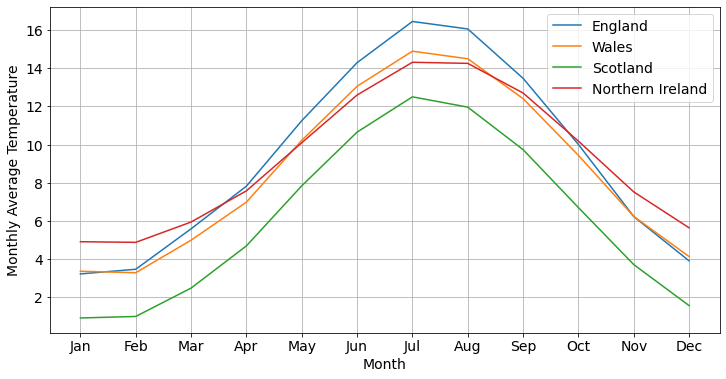

In [6]:
# Convert the 'date' column to datetime if it's not already in datetime format
data_en['date'] = pd.to_datetime(data_en['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

# Filter data to include only years 1981-2022
start_year = 1981
end_year = 2022

data_en_filtered = data_en[(data_en['date'].dt.year >= start_year) & (data_en['date'].dt.year <= end_year)]
data_sc_filtered = data_sc[(data_sc['date'].dt.year >= start_year) & (data_sc['date'].dt.year <= end_year)]
data_wl_filtered = data_wl[(data_wl['date'].dt.year >= start_year) & (data_wl['date'].dt.year <= end_year)]
data_ir_filtered = data_ir[(data_ir['date'].dt.year >= start_year) & (data_ir['date'].dt.year <= end_year)]

# Calculate monthly average temperatures for each location
data_en_monthly_avg = data_en_filtered.groupby(data_en_filtered['date'].dt.month)['T2M'].mean()
data_sc_monthly_avg = data_sc_filtered.groupby(data_sc_filtered['date'].dt.month)['T2M'].mean()
data_wl_monthly_avg = data_wl_filtered.groupby(data_wl_filtered['date'].dt.month)['T2M'].mean()
data_ir_monthly_avg = data_ir_filtered.groupby(data_ir_filtered['date'].dt.month)['T2M'].mean()

# Create a line plot
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.rcParams['text.antialiased'] = True
plt.figure(dpi=1200)  # Set the DPI to a higher value

plt.figure(figsize=(12, 6))
eng_plot= plt.plot(months, data_en_monthly_avg, label='England')
plt.plot(months, data_wl_monthly_avg, label='Wales')
plt.plot(months, data_sc_monthly_avg, label='Scotland')
plt.plot(months, data_ir_monthly_avg, label='Northern Ireland')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly Average Temperature', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.savefig('Monthly average temperature.png', dpi=1200, bbox_inches='tight', quality=99)
plt.show()


### ###############################################################################################